In [1]:
import pandas as pd
df=pd.read_csv('RomeTaxis20-11-2015.csv')
df.head(3)

,Taxi ID,Date,Time,Latitude,Longitude,Temperature
0,224,02-01-2014,00:01:42.3687+01,41.966365,12.452732,3.745403
1,321,02-01-2014,01:06:53.847896+01,41.951781,12.451760,3.682831
2,232,02-01-2014,03:33:22.631728+01,41.932566,12.415688,3.873112


In [2]:
ti=df['Time']
ti=[i.split(':') for i in ti]
#print(ti.head(5))
ti=[ (int(i[0])*60*60) + (int(i[1])*60) + (int(i[2].split('.')[0])) for i in ti]
#ti=[ i[0] +':'+ i[1] +':'+ i[2].split('.')[0] for i in ti]
print(ti)
X=np.asarray(ti)

[102, 4013, 12802, 21068, 6581, 16840, 11397, 23621, 29209, 31672, 37917, 39992, 40695, 26002, 36901, 22588, 42371, 44389, 47142, 47744, 50405, 50501, 56151, 57749, 61325, 64700, 51066, 52349, 54706, 56504, 59281, 46361, 56734, 57185, 59855, 60444, 61573, 62121, 65748, 68998, 71905, 74588, 76660, 77059, 78841, 82722, 86390, 72079, 73154, 79229, 83752, 67069, 75505, 81109, 21587, 14619, 10895, 12067, 2593, 935, 20465, 2350, 19351, 2690, 7293, 6668, 4599, 5598, 218, 2000, 10036, 4006, 2357, 16016, 1474, 6158, 3968, 11265, 20292, 7399, 4492, 16535, 21614, 21687, 22496, 23635, 27378, 29917, 30339, 31011, 33432, 34854, 38873, 38955, 22935, 23922, 36149, 37334, 39600, 42999, 25329, 28090, 32482, 36248, 39721, 41722, 54046, 55759, 45358, 55153, 56962, 43421, 46410, 48541, 52681, 47637, 64322, 61991, 52554, 59672, 61454, 44831, 57447, 46834, 57632, 58461, 50801, 58302, 44566, 49335, 52685, 60923, 50680, 57347, 62227, 43489, 63405, 51364, 51668, 56519, 50304, 53851, 51479, 45188, 64446, 63378, 

In [3]:
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
#ti=[datetime.strptime(i,'hh:mm:ss') for i in ti]
#print(ti)

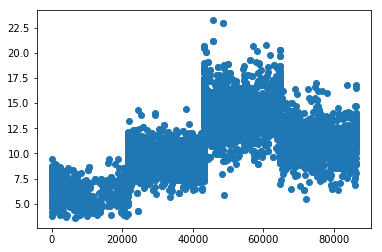

In [4]:
#y=[i/df['Temperature'].max() for i in df['Temperature']]
y=[i for i in df['Temperature']]
plt.scatter(ti,y)

In [6]:
from sklearn.linear_model import LinearRegression

In [5]:
y=np.asarray(y)
X=np.asarray(ti)
print(y)
print(X)

#X_=np.argsort(X)
#print(X_.shape)
X=X.reshape(1, -1)
y=y.reshape(1, -1)
print(X.shape)
print(y.shape)
'''
X1=X[X_]
print(X1.shape)
y1=y[X_]
print(y1.shape)
X1=X1[:X1.shape[1]//6,]
y1=y1[,:y1.shape[1]//6]
print(X1.shape)
print(y1.shape)
'''

[3.74540267 3.68283087 3.87311153 ... 7.45007524 7.50488702 8.77546807]
[  102  4013 12802 ... 76957 85945 82176]
(1, 5030)
(1, 5030)


'\nX1=X[X_]\nprint(X1.shape)\ny1=y[X_]\nprint(y1.shape)\nX1=X1[:X1.shape[1]//6,]\ny1=y1[,:y1.shape[1]//6]\nprint(X1.shape)\nprint(y1.shape)\n'

In [7]:
reg = LinearRegression().fit(X, y)

In [8]:
y_pred = reg.predict(X)
plt.scatter(X1,y1,color='black')
plt.plot(X,y_pred,color='blue', linewidth=3)
plt.show()

NameError: name 'X1' is not defined

In [10]:
plt.plot(X1,y_pred,color='blue', linewidth=3)
plt.show()

NameError: name 'y_pred' is not defined

In [49]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y1))

0.0


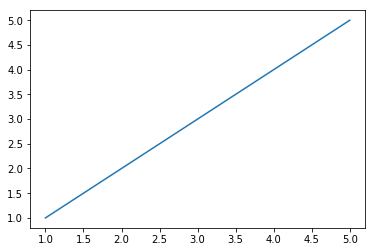

In [24]:
plt.plot([1,2,3,4,5],[1,2,3,4,5])

In [50]:
!pip3 install --user statsmodels

     |████████████████████████████████| 8.1MB 5.2MB/s eta 0:00:01     |██████▋                         | 1.7MB 232kB/s eta 0:00:28
     |████████████████████████████████| 235kB 941kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [54]:
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
lm = sm.OLS(y1, sm.add_constant(X1)).fit()
print("The rsquared values is " + str(lm.rsquared))

ValueError: shapes (1,838) and (1,838) not aligned: 838 (dim 1) != 1 (dim 0)

In [1]:
!pip3 install --user yellowbrick

     |████████████████████████████████| 389kB 17kB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


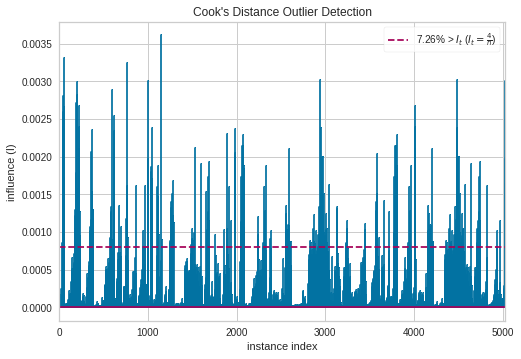

In [11]:
#so i am stuck at the array and then apply sm
from yellowbrick.regressor import CooksDistance
#from yellowbrick.datasets import load_concrete

# Load the regression dataset
#X, y = load_concrete()
X=X.reshape(-1,1)
y=y.reshape(-1)
# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()